<a href="https://colab.research.google.com/github/vsangireddy27/MachineLearningProjects/blob/main/Larkin_Street_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
label_encoder = LabelEncoder()

In [39]:
df = pd.read_csv('/content/Updated Enrollment with Category Final - Nov 2024.csv')
df.head()

,Attainedcertificate,Category,Certificatedate,Course Group,Course Id,Coursename,Coursetype,Datecompleted,Dateedited,Dateenrolled,...,Vendor,#Oftimesaccessed,CREDITS (hours),Credits (minutes),Daysuntildue,Employeenumber,Progress(%),Score(%),Time Variance,Timespent(Min)
0,No,Leadership Development,NaN,Course1,4f3a775f-a0d5-4896-9cf4-64b16165b460,1. Leadership Development Training: Emotional ...,InstructorLedCourse,10/28/2020 6:30:00 PM,2/3/2021 1:32:29 AM,10/8/2020 7:00:00 AM,...,NaN,0,6.0,360.0,NaN,590.0,100.0,100.0,0.0,360
1,No,Leadership Development,NaN,Course1,4f3a775f-a0d5-4896-9cf4-64b16165b460,1. Leadership Development Training: Emotional ...,InstructorLedCourse,10/28/2020 6:30:00 PM,2/3/2021 1:32:29 AM,10/9/2020 7:00:00 AM,...,NaN,0,1.5,90.0,NaN,1399.0,100.0,25.0,-270.0,360
2,No,Leadership Development,NaN,Course1,4f3a775f-a0d5-4896-9cf4-64b16165b460,1. Leadership Development Training: Emotional ...,InstructorLedCourse,10/28/2020 6:30:00 PM,2/3/2021 1:32:29 AM,10/9/2020 7:00:00 AM,...,NaN,0,6.0,360.0,NaN,1494.0,100.0,100.0,0.0,360
3,No,Leadership Development,NaN,Course1,4f3a775f-a0d5-4896-9cf4-64b16165b460,1. Leadership Development Training: Emotional ...,InstructorLedCourse,10/28/2020 6:30:00 PM,2/3/2021 1:32:29 AM,10/9/2020 7:00:00 AM,...,NaN,0,6.0,360.0,NaN,1529.0,100.0,100.0,0.0,360
4,No,Leadership Development,NaN,Course1,4f3a775f-a0d5-4896-9cf4-64b16165b460,1. Leadership Development Training: Emotional ...,InstructorLedCourse,10/28/2020 6:30:00 PM,2/3/2021 1:32:29 AM,1/15/2021 1:05:42 AM,...,NaN,0,NaN,NaN,NaN,1648.0,100.0,NaN,NaN,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9469 entries, 0 to 9468
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Attainedcertificate   9469 non-null   object 
 1   Category              8488 non-null   object 
 2   Certificatedate       964 non-null    object 
 3   Course Group          9469 non-null   object 
 4   Course Id             9469 non-null   object 
 5   Coursename            9469 non-null   object 
 6   Coursetype            9469 non-null   object 
 7   Datecompleted         7106 non-null   object 
 8   Dateedited            9469 non-null   object 
 9   Dateenrolled          9469 non-null   object 
 10  Datehired             9469 non-null   object 
 11  Datestarted           9469 non-null   object 
 12  Department            9469 non-null   object 
 13  Enrollmentid          9469 non-null   object 
 14  Enrollmentmethod      9469 non-null   object 
 15  Isenrolled           

In [41]:
df = df.drop(columns = ['Attainedcertificate', 'Enrollmentid', 'Vendor', 'Course Group', 'Coursename', 'Certificatedate', 'Course Id'])
df.head()

,Category,Coursetype,Datecompleted,Dateedited,Dateenrolled,Datehired,Datestarted,Department,Enrollmentmethod,Isenrolled,...,Status,#Oftimesaccessed,CREDITS (hours),Credits (minutes),Daysuntildue,Employeenumber,Progress(%),Score(%),Time Variance,Timespent(Min)
0,Leadership Development,InstructorLedCourse,10/28/2020 6:30:00 PM,2/3/2021 1:32:29 AM,10/8/2020 7:00:00 AM,6/1/2004 12:00:00 AM,10/8/2020 7:00:00 AM,Strategy,Automatic,Yes,...,Complete,0,6.0,360.0,NaN,590.0,100.0,100.0,0.0,360
1,Leadership Development,InstructorLedCourse,10/28/2020 6:30:00 PM,2/3/2021 1:32:29 AM,10/9/2020 7:00:00 AM,2/24/2014 12:00:00 AM,10/9/2020 7:00:00 AM,"H3: Routz, CE, CC",Automatic,Yes,...,Complete,0,1.5,90.0,NaN,1399.0,100.0,25.0,-270.0,360
2,Leadership Development,InstructorLedCourse,10/28/2020 6:30:00 PM,2/3/2021 1:32:29 AM,10/9/2020 7:00:00 AM,12/29/2014 12:00:00 AM,10/9/2020 7:00:00 AM,"HD: PW, RU, YAC, LEASE",Automatic,Yes,...,Complete,0,6.0,360.0,NaN,1494.0,100.0,100.0,0.0,360
3,Leadership Development,InstructorLedCourse,10/28/2020 6:30:00 PM,2/3/2021 1:32:29 AM,10/9/2020 7:00:00 AM,3/23/2015 12:00:00 AM,10/9/2020 7:00:00 AM,"HB: Geary, DYS, 1020​, TP",Automatic,Yes,...,Complete,0,6.0,360.0,NaN,1529.0,100.0,100.0,0.0,360
4,Leadership Development,InstructorLedCourse,10/28/2020 6:30:00 PM,2/3/2021 1:32:29 AM,1/15/2021 1:05:42 AM,1/4/2016 12:00:00 AM,1/15/2021 1:05:33 AM,Finance,Admin,Yes,...,Absent,0,NaN,NaN,NaN,1648.0,100.0,NaN,NaN,0


In [42]:
df['Promotedtoleadership'].fillna(value = 'No', inplace = True)
df['Promotedtoleadership'] = label_encoder.fit_transform(df['Promotedtoleadership'])
df['Leadership'] = label_encoder.fit_transform(df['Leadership'])
df['Enrollmentmethod'] = label_encoder.fit_transform(df['Enrollmentmethod'])
df['Category'] = label_encoder.fit_transform(df['Category'])
df['Coursetype'] = label_encoder.fit_transform(df['Coursetype'])
df['Status'] = label_encoder.fit_transform(df['Status'])
df.head()

<ipython-input-42-509da29924b6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Promotedtoleadership'].fillna(value = 'No', inplace = True)


,Category,Coursetype,Datecompleted,Dateedited,Dateenrolled,Datehired,Datestarted,Department,Enrollmentmethod,Isenrolled,...,Status,#Oftimesaccessed,CREDITS (hours),Credits (minutes),Daysuntildue,Employeenumber,Progress(%),Score(%),Time Variance,Timespent(Min)
0,3,1,10/28/2020 6:30:00 PM,2/3/2021 1:32:29 AM,10/8/2020 7:00:00 AM,6/1/2004 12:00:00 AM,10/8/2020 7:00:00 AM,Strategy,1,Yes,...,1,0,6.0,360.0,NaN,590.0,100.0,100.0,0.0,360
1,3,1,10/28/2020 6:30:00 PM,2/3/2021 1:32:29 AM,10/9/2020 7:00:00 AM,2/24/2014 12:00:00 AM,10/9/2020 7:00:00 AM,"H3: Routz, CE, CC",1,Yes,...,1,0,1.5,90.0,NaN,1399.0,100.0,25.0,-270.0,360
2,3,1,10/28/2020 6:30:00 PM,2/3/2021 1:32:29 AM,10/9/2020 7:00:00 AM,12/29/2014 12:00:00 AM,10/9/2020 7:00:00 AM,"HD: PW, RU, YAC, LEASE",1,Yes,...,1,0,6.0,360.0,NaN,1494.0,100.0,100.0,0.0,360
3,3,1,10/28/2020 6:30:00 PM,2/3/2021 1:32:29 AM,10/9/2020 7:00:00 AM,3/23/2015 12:00:00 AM,10/9/2020 7:00:00 AM,"HB: Geary, DYS, 1020​, TP",1,Yes,...,1,0,6.0,360.0,NaN,1529.0,100.0,100.0,0.0,360
4,3,1,10/28/2020 6:30:00 PM,2/3/2021 1:32:29 AM,1/15/2021 1:05:42 AM,1/4/2016 12:00:00 AM,1/15/2021 1:05:33 AM,Finance,0,Yes,...,0,0,NaN,NaN,NaN,1648.0,100.0,NaN,NaN,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9469 entries, 0 to 9468
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Category              9469 non-null   int64  
 1   Coursetype            9469 non-null   int64  
 2   Datecompleted         7106 non-null   object 
 3   Dateedited            9469 non-null   object 
 4   Dateenrolled          9469 non-null   object 
 5   Datehired             9469 non-null   object 
 6   Datestarted           9469 non-null   object 
 7   Department            9469 non-null   object 
 8   Enrollmentmethod      9469 non-null   int64  
 9   Isenrolled            9469 non-null   object 
 10  Jobtitle              9469 non-null   object 
 11  Lastloggedin          9452 non-null   object 
 12  Leadership            9469 non-null   int64  
 13  Promotedtoleadership  9469 non-null   int64  
 14  Stafftype             9469 non-null   object 
 15  Status               

In [44]:
df['Stafftype'].value_counts()
df['Stafftype'] = label_encoder.fit_transform(df['Stafftype'])
df['Isenrolled'].value_counts()
df['Isenrolled'] = label_encoder.fit_transform(df['Isenrolled'])
df.head()

,Category,Coursetype,Datecompleted,Dateedited,Dateenrolled,Datehired,Datestarted,Department,Enrollmentmethod,Isenrolled,...,Status,#Oftimesaccessed,CREDITS (hours),Credits (minutes),Daysuntildue,Employeenumber,Progress(%),Score(%),Time Variance,Timespent(Min)
0,3,1,10/28/2020 6:30:00 PM,2/3/2021 1:32:29 AM,10/8/2020 7:00:00 AM,6/1/2004 12:00:00 AM,10/8/2020 7:00:00 AM,Strategy,1,1,...,1,0,6.0,360.0,NaN,590.0,100.0,100.0,0.0,360
1,3,1,10/28/2020 6:30:00 PM,2/3/2021 1:32:29 AM,10/9/2020 7:00:00 AM,2/24/2014 12:00:00 AM,10/9/2020 7:00:00 AM,"H3: Routz, CE, CC",1,1,...,1,0,1.5,90.0,NaN,1399.0,100.0,25.0,-270.0,360
2,3,1,10/28/2020 6:30:00 PM,2/3/2021 1:32:29 AM,10/9/2020 7:00:00 AM,12/29/2014 12:00:00 AM,10/9/2020 7:00:00 AM,"HD: PW, RU, YAC, LEASE",1,1,...,1,0,6.0,360.0,NaN,1494.0,100.0,100.0,0.0,360
3,3,1,10/28/2020 6:30:00 PM,2/3/2021 1:32:29 AM,10/9/2020 7:00:00 AM,3/23/2015 12:00:00 AM,10/9/2020 7:00:00 AM,"HB: Geary, DYS, 1020​, TP",1,1,...,1,0,6.0,360.0,NaN,1529.0,100.0,100.0,0.0,360
4,3,1,10/28/2020 6:30:00 PM,2/3/2021 1:32:29 AM,1/15/2021 1:05:42 AM,1/4/2016 12:00:00 AM,1/15/2021 1:05:33 AM,Finance,0,1,...,0,0,NaN,NaN,NaN,1648.0,100.0,NaN,NaN,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9469 entries, 0 to 9468
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Category              9469 non-null   int64  
 1   Coursetype            9469 non-null   int64  
 2   Datecompleted         7106 non-null   object 
 3   Dateedited            9469 non-null   object 
 4   Dateenrolled          9469 non-null   object 
 5   Datehired             9469 non-null   object 
 6   Datestarted           9469 non-null   object 
 7   Department            9469 non-null   object 
 8   Enrollmentmethod      9469 non-null   int64  
 9   Isenrolled            9469 non-null   int64  
 10  Jobtitle              9469 non-null   object 
 11  Lastloggedin          9452 non-null   object 
 12  Leadership            9469 non-null   int64  
 13  Promotedtoleadership  9469 non-null   int64  
 14  Stafftype             9469 non-null   int64  
 15  Status               

In [46]:
df = df.select_dtypes(include = ['int64', 'float64'])
df.head()

,Category,Coursetype,Enrollmentmethod,Isenrolled,Leadership,Promotedtoleadership,Stafftype,Status,#Oftimesaccessed,CREDITS (hours),Credits (minutes),Daysuntildue,Employeenumber,Progress(%),Score(%),Time Variance,Timespent(Min)
0,3,1,1,1,1,0,0,1,0,6.0,360.0,NaN,590.0,100.0,100.0,0.0,360
1,3,1,1,1,1,0,2,1,0,1.5,90.0,NaN,1399.0,100.0,25.0,-270.0,360
2,3,1,1,1,1,0,2,1,0,6.0,360.0,NaN,1494.0,100.0,100.0,0.0,360
3,3,1,1,1,1,0,2,1,0,6.0,360.0,NaN,1529.0,100.0,100.0,0.0,360
4,3,1,0,1,1,0,0,0,0,NaN,NaN,NaN,1648.0,100.0,NaN,NaN,0


In [47]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9469 entries, 0 to 9468
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Category              9469 non-null   int64  
 1   Coursetype            9469 non-null   int64  
 2   Enrollmentmethod      9469 non-null   int64  
 3   Isenrolled            9469 non-null   int64  
 4   Leadership            9469 non-null   int64  
 5   Promotedtoleadership  9469 non-null   int64  
 6   Stafftype             9469 non-null   int64  
 7   Status                9469 non-null   int64  
 8   #Oftimesaccessed      9469 non-null   int64  
 9   CREDITS (hours)       5951 non-null   float64
 10  Credits (minutes)     5951 non-null   float64
 11  Daysuntildue          4525 non-null   float64
 12  Employeenumber        9394 non-null   float64
 13  Progress(%)           9469 non-null   float64
 14  Score(%)              2435 non-null   float64
 15  Time Variance        

<Axes: >

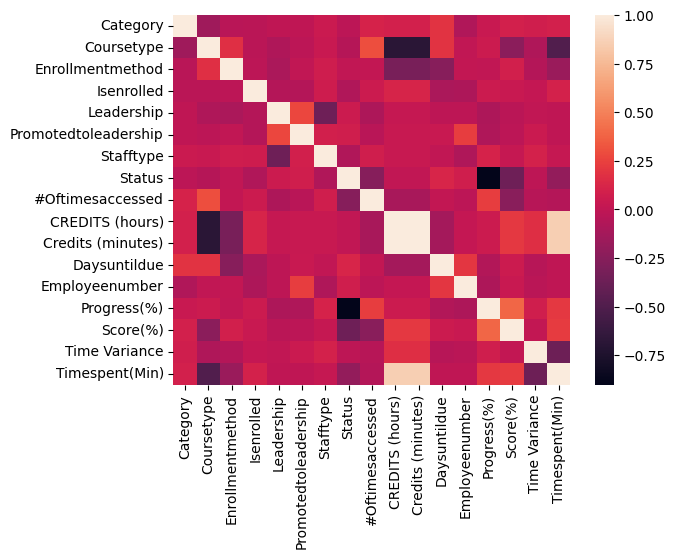

In [48]:
sns.heatmap(df.corr())

In [49]:
df.shape
df = df.drop(columns = ['Daysuntildue', 'Score(%)', 'CREDITS (hours)', 'Employeenumber', 'Status', 'Time Variance', 'Credits (minutes)'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9469 entries, 0 to 9468
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Category              9469 non-null   int64  
 1   Coursetype            9469 non-null   int64  
 2   Enrollmentmethod      9469 non-null   int64  
 3   Isenrolled            9469 non-null   int64  
 4   Leadership            9469 non-null   int64  
 5   Promotedtoleadership  9469 non-null   int64  
 6   Stafftype             9469 non-null   int64  
 7   #Oftimesaccessed      9469 non-null   int64  
 8   Progress(%)           9469 non-null   float64
 9   Timespent(Min)        9469 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 739.9 KB


In [50]:
df['Progress(%)'] = np.where(df['Progress(%)'] >= 100, 1, 0)
print(df['Progress(%)'].value_counts())

Progress(%)
1    6896
0    2573
Name: count, dtype: int64


In [51]:
Y = df['Progress(%)']
X = df.drop(columns = ['Progress(%)'])
X

,Category,Coursetype,Enrollmentmethod,Isenrolled,Leadership,Promotedtoleadership,Stafftype,#Oftimesaccessed,Timespent(Min)
0,3,1,1,1,1,0,0,0,360
1,3,1,1,1,1,0,2,0,360
2,3,1,1,1,1,0,2,0,360
3,3,1,1,1,1,0,2,0,360
4,3,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
9464,2,2,4,1,1,1,2,1,35
9465,7,2,0,1,1,1,2,1,237
9466,2,2,1,1,1,1,2,0,189
9467,2,2,1,1,1,1,2,0,331


In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

In [53]:
lrm = LogisticRegression(max_iter = 1000, random_state = 42)
lrm.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [54]:
pred = lrm.predict(X_test)

In [55]:
accuracy_score(Y_test, pred)

0.7663674762407603

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
pred_rf = rf.fit(X_train, Y_train).predict(X_test)

In [57]:
predrf = rf.predict(X_test)
accuracy_score(Y_test,predrf)


0.8988912354804647

In [58]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
predxg = xgb.fit(X_train, Y_train).predict(X_test)
accuracy_score(Y_test, predxg)


0.9017951425554382